In [2]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hsv
from imageio import imread
import numpy as np
%matplotlib inline

In [3]:
#load in data
img = imread('../../dataset/PlantVillage/RGB/Potato___Healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG')


/Users/boshan/opt/anaconda3/envs/cs231n/lib/python3.7/site-packages/skimage/color/colorconv.py:271: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/Users/boshan/opt/anaconda3/envs/cs231n/lib/python3.7/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]


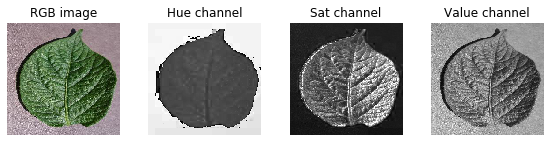

In [5]:
hsv_img = rgb2hsv(img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
sat_img = hsv_img[:,:,1]
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(8, 2))
ax0.imshow(img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap ='gray')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(sat_img, cmap ='gray')
ax2.set_title("Sat channel")
ax2.axis('off')
ax3.imshow(value_img, cmap ='gray')
ax3.set_title("Value channel")
ax3.axis('off')
fig.tight_layout()

In [7]:
from skimage.exposure import histogram
#help(histogram)
#hist, histcenters = histogram(hue_img, nbins=8)
n, bins, patches = plt.hist(hue_img.ravel(), bins=5)
plt.title("Hue")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.savefig('Hue Histogram')
plt.show()

0.6035281450320513


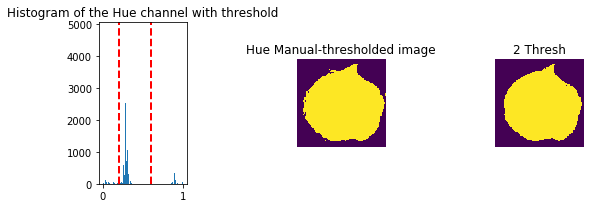

In [13]:
from skimage import data
from skimage import filters
from skimage import exposure

#manual threshold
hue_threshold = 0.4
binary_img = hue_img < hue_threshold

#otsu
otsuThresh = filters.threshold_otsu(hue_img)
print(otsuThresh)
otsu_img = hue_img < otsuThresh

#2 thresh
binary2 = np.where(hue_img > 0.2, 255, 0)
binary3 = np.where(hue_img <otsuThresh, 255, 0)
binary4 = binary2&binary3


fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 3))

ax0.hist(hue_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=0.2, color='r', linestyle='dashed', linewidth=2)
ax0.axvline(x=otsuThresh, color='r', linestyle='dashed', linewidth=2)


#ax0.set_xbound(0, 0.4)
ax1.imshow(otsu_img)
ax1.set_title("Hue Manual-thresholded image")
ax1.axis('off')

ax2.imshow(binary4)
ax2.set_title("2 Thresh")
ax2.axis('off')

fig.tight_layout()

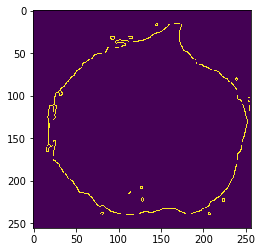

In [14]:
from skimage.feature import canny
edges = canny(binary_img)
plt.imshow(edges)

In [15]:
from scipy import ndimage as ndi
fill_leaf = ndi.binary_fill_holes(edges)
plt.imshow(fill_leaf)

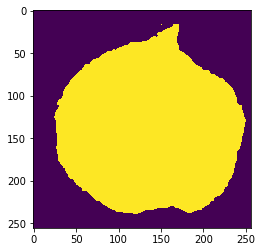

In [16]:
medFilterThre2= ndi.median_filter(binary4, size = 3)
plt.imshow(medFilterThre2)
#plt.imshow(ndi.minimum_filter(otsu_img, size = 3))

In [17]:
label_objects, nb_labels = ndi.label(medFilterThre2)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 40
mask_sizes[0] = 0
medFilterThre2C = mask_sizes[label_objects]
plt.imshow(medFilterThre2C)



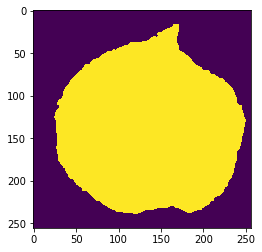

In [18]:
morpho=ndi.binary_opening(medFilterThre2C)
plt.imshow(morpho)



In [19]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, figsize=(8, 3))

ax0.imshow(img)
ax0.set_title("C")
ax0.axis('off')

#ax0.set_xbound(0, 0.4)
ax1.imshow(img[:,:,0], cmap='gray')
ax1.set_title("R")
ax1.axis('off')

ax2.imshow(img[:,:,1], cmap='gray')
ax2.set_title("G")
ax2.axis('off')

ax3.imshow(img[:,:,2], cmap='gray')
ax3.set_title("B")
ax3.axis('off')

#apply filter mask
finalImage = np.zeros((img.shape))
for i in range(3):
    finalImage[:,:,i]= img[:,:,i]* morpho

ax4.imshow(finalImage.as)
ax4.set_title(finalImage)
ax4.axis('off')

   

fig.tight_layout()

SyntaxError: invalid syntax (<ipython-input-19-401fbe237590>, line 25)